# Data Analysis of Qubit encodings
In this notebook we explore the structure of the `Radial` qubit encoding.

In [1]:
import matplotlib.pyplot as plt
import qsvm4eo
import numpy as np

In [2]:
# Load the data
# We'll only use the training data in this notebook.
n_features = 4
x_train, _, _, _, _ = qsvm4eo.load_data(
    data_path="..", num_features=n_features, scale_features=True
)

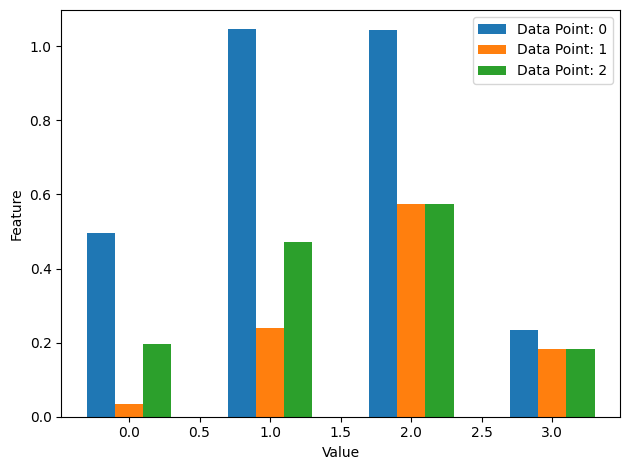

In [3]:
# Let's graph the first 3 feature vectors.
x = np.arange(n_features)
width = 0.2
for c in range(3):
    plt.bar(
        x + (2 * c - 2) * width * 0.5,
        x_train[c],
        width=width,
        label="Data Point: %i" % c,
    )
plt.xlabel("Value")
plt.ylabel("Feature")

plt.legend()
plt.tight_layout()
plt.show()

In [4]:
# Convert the data to qubit coordinates
# We only en
encoding = qsvm4eo.RadialEncoding(
    max_feature=np.max(x_train), shift=1.0, scaling=5.4, n_features=n_features
)
qbits_train = [encoding.encode(x) for x in x_train]

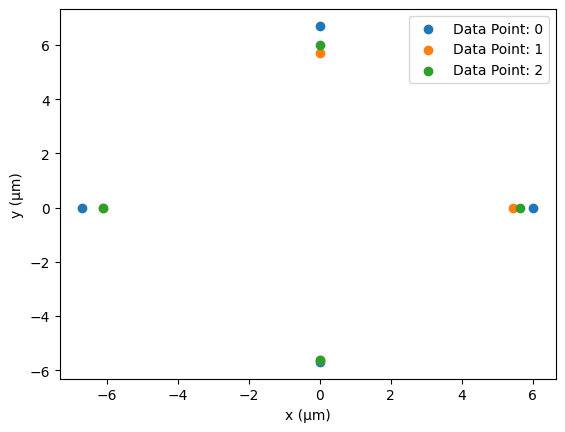

In [5]:
# Let's graph the first 3 qubit geometries.
for c, qb in enumerate(qbits_train[:3]):
    plt.scatter(qb[:, 0], qb[:, 1], label="Data Point: %i" % c)

plt.xlabel("x (µm)")
plt.ylabel("y (µm)")

plt.legend()
plt.show()

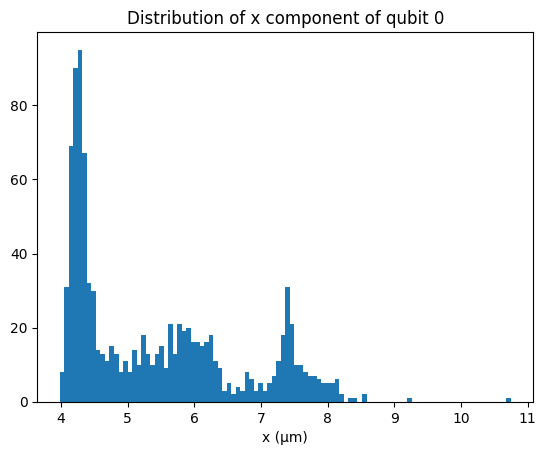

In [6]:
plt.title("Distribution of x component of qubit 0")
plt.hist([d[:, 0][0].item() for d in qbits_train], bins=100)
plt.xlabel("x (µm)")
plt.show()

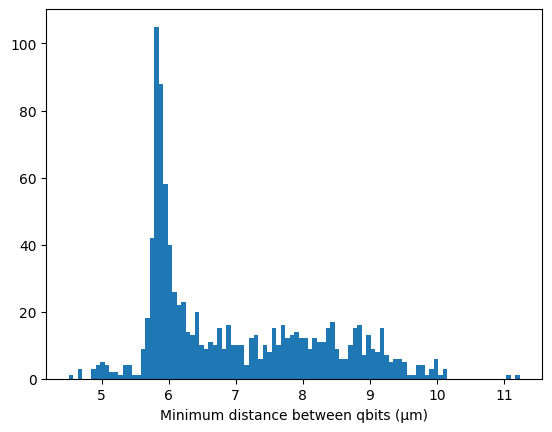

In [7]:
# Finally let's see what the minimum distance between the qubits looks like.
def get_qbit_distances(qbit_coords):
    d_ij = []
    for i in range(0, n_features - 1):
        for j in range(i + 1, n_features):
            d_ij.append(np.linalg.norm(qbit_coords[i] - qbit_coords[j]))
    return np.array(d_ij)


dists_train = np.array([get_qbit_distances(q) for q in qbits_train])

plt.hist(np.min(dists_train, 1), bins=100)
plt.xlabel("Minimum distance between qbits (µm)")
plt.show()